In [1]:
import os

# List all files and folders in the current directory
print("üìÅ Current Directory Contents:")
for item in os.listdir():
    print("‚Äî", item)

üìÅ Current Directory Contents:
‚Äî .ipynb_checkpoints
‚Äî Kalman_filter_sim.ipynb
‚Äî release


In [3]:
release_path = "release"
print(f"üìÅ Contents of folder: {release_path}")
for item in os.listdir(release_path):
    print("‚Äî", item)

üìÅ Contents of folder: release
‚Äî taxi_log_2008_by_id
‚Äî Thumbs.db
‚Äî user_guide.pdf


In [5]:
data_folder = "release/taxi_log_2008_by_id"
print(f"üìÅ Contents of: {data_folder}")
for item in os.listdir(data_folder):
    print("‚Äî", item)

üìÅ Contents of: release/taxi_log_2008_by_id
‚Äî 1.txt
‚Äî 10.txt
‚Äî 100.txt
‚Äî 1000.txt
‚Äî 10000.txt
‚Äî 10001.txt
‚Äî 10002.txt
‚Äî 10003.txt
‚Äî 10004.txt
‚Äî 10005.txt
‚Äî 10006.txt
‚Äî 10007.txt
‚Äî 10008.txt
‚Äî 10009.txt
‚Äî 1001.txt
‚Äî 10010.txt
‚Äî 10011.txt
‚Äî 10012.txt
‚Äî 10013.txt
‚Äî 10014.txt
‚Äî 10015.txt
‚Äî 10016.txt
‚Äî 10017.txt
‚Äî 10018.txt
‚Äî 10019.txt
‚Äî 1002.txt
‚Äî 10020.txt
‚Äî 10021.txt
‚Äî 10022.txt
‚Äî 10023.txt
‚Äî 10024.txt
‚Äî 10025.txt
‚Äî 10026.txt
‚Äî 10027.txt
‚Äî 10028.txt
‚Äî 10029.txt
‚Äî 1003.txt
‚Äî 10030.txt
‚Äî 10031.txt
‚Äî 10032.txt
‚Äî 10033.txt
‚Äî 10034.txt
‚Äî 10035.txt
‚Äî 10036.txt
‚Äî 10037.txt
‚Äî 10038.txt
‚Äî 10039.txt
‚Äî 1004.txt
‚Äî 10040.txt
‚Äî 10041.txt
‚Äî 10042.txt
‚Äî 10043.txt
‚Äî 10044.txt
‚Äî 10045.txt
‚Äî 10046.txt
‚Äî 10047.txt
‚Äî 10048.txt
‚Äî 10049.txt
‚Äî 1005.txt
‚Äî 10050.txt
‚Äî 10051.txt
‚Äî 10052.txt
‚Äî 10053.txt
‚Äî 10054.txt
‚Äî 10055.txt
‚Äî 10056.txt
‚Äî 10057.txt
‚Äî 10058.txt
‚Äî 10059.txt
‚Äî

In [7]:
import pandas as pd

# Define the path to the file
file_path = "release/taxi_log_2008_by_id/1.txt"

# Read the file into a DataFrame
df = pd.read_csv(file_path, header=None, names=["Taxi_ID", "Timestamp", "Longitude", "Latitude"])

# Display the first few rows
df.head()

Taxi_ID            Timestamp  Longitude  Latitude
0        1  2008-02-02 15:36:08  116.51172  39.92123
1        1  2008-02-02 15:46:08  116.51135  39.93883
2        1  2008-02-02 15:46:08  116.51135  39.93883
3        1  2008-02-02 15:56:08  116.51627  39.91034
4        1  2008-02-02 16:06:08  116.47186  39.91248

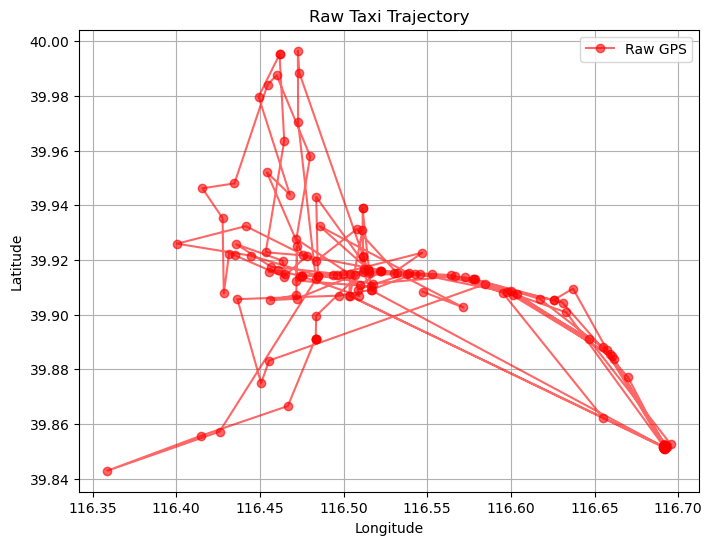

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(df["Longitude"], df["Latitude"], 'o-', label="Raw GPS", color='red', alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Raw Taxi Trajectory")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import numpy as np

# Prepare measurement data
measurements = np.vstack((df["Longitude"].values, df["Latitude"].values)).T

# Initialize Kalman Filter parameters
n = len(measurements)
predicted = []
x = np.array([[measurements[0, 0]], [measurements[0, 1]]])  # initial state (position)
P = np.eye(2) * 1000  # initial uncertainty
F = np.eye(2)         # state transition matrix
H = np.eye(2)         # measurement function
R = np.eye(2) * 0.0001  # measurement noise
Q = np.eye(2) * 0.00001  # process noise

# Kalman Filter loop
for z in measurements:
    # Prediction
    x = F @ x
    P = F @ P @ F.T + Q

    # Update
    Z = np.array([[z[0]], [z[1]]])
    y = Z - H @ x
    S = H @ P @ H.T + R
    K = P @ H.T @ np.linalg.inv(S)
    x = x + K @ y
    P = (np.eye(2) - K @ H) @ P

    predicted.append(x.flatten())

predicted = np.array(predicted)


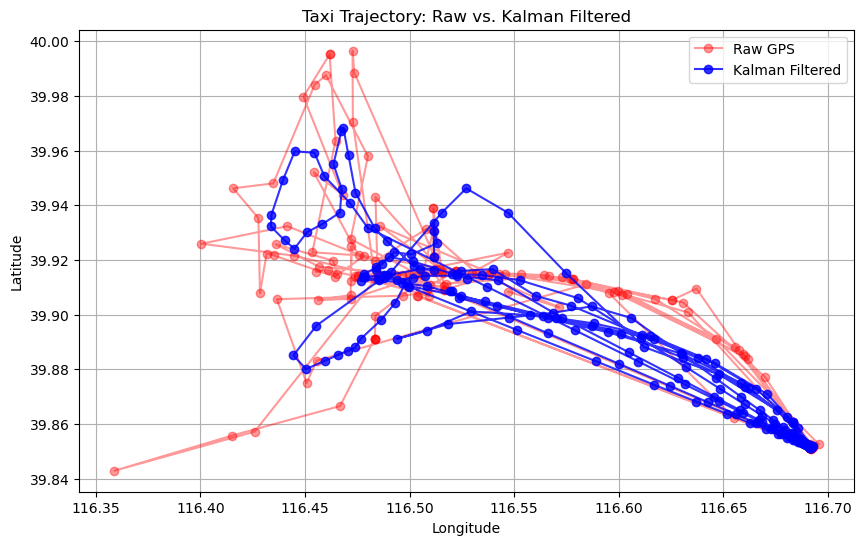

In [15]:
plt.figure(figsize=(10, 6))

# Raw trajectory
plt.plot(df["Longitude"], df["Latitude"], 'ro-', label='Raw GPS', alpha=0.4)

# Kalman filtered trajectory
plt.plot(predicted[:, 0], predicted[:, 1], 'bo-', label='Kalman Filtered', alpha=0.8)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Taxi Trajectory: Raw vs. Kalman Filtered")
plt.legend()
plt.grid(True)
plt.show()
